# VisionMath - Testing Notebook

In [1]:
import numpy as np
import cv2
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
from ipywidgets import interact, fixed, widgets
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
images_path = '../images/'

### **<span style="color:green"><b><i>Testing Images</i></b></span>**

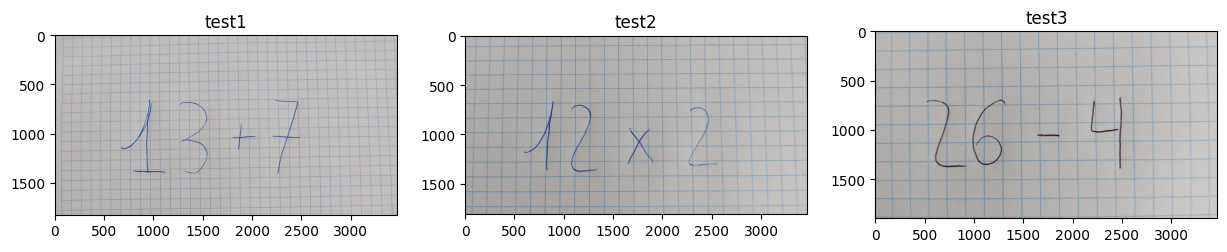

In [2]:
image_1 = cv2.imread(images_path + "test1.jpg",-1)
image_2 = cv2.imread(images_path + "test2.jpg",-1)
image_3 = cv2.imread(images_path + "test3.jpg",-1)

image_1 = cv2.cvtColor(image_1,cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(image_2,cv2.COLOR_BGR2RGB)
image_3 = cv2.cvtColor(image_3,cv2.COLOR_BGR2RGB)

plt.subplot(1,3,1)
plt.title("test1")
plt.imshow(image_1)

plt.subplot(132)
plt.title("test2")
plt.imshow(image_2)

plt.subplot(133)
plt.title("test3")
plt.imshow(image_3)

### **<span style="color:green"><b><i>GrayScale Images</i></b></span>**

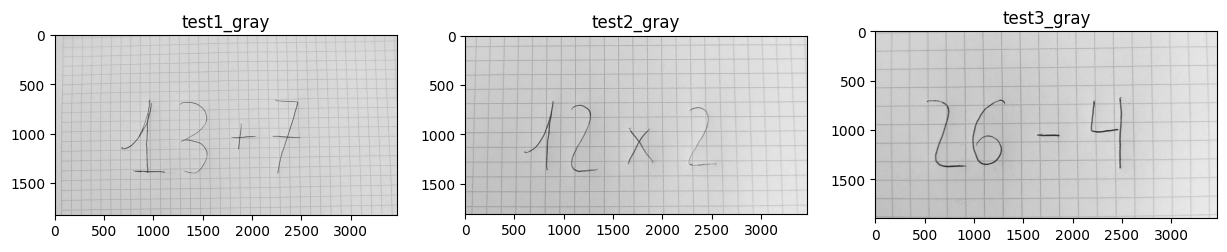

In [3]:
image1_gray = np.copy(image_1)
image1_gray = cv2.cvtColor(image1_gray,cv2.COLOR_RGB2GRAY)
image2_gray = np.copy(image_2)
image2_gray = cv2.cvtColor(image2_gray,cv2.COLOR_RGB2GRAY)
image3_gray = np.copy(image_3)
image3_gray = cv2.cvtColor(image3_gray,cv2.COLOR_RGB2GRAY)

plt.subplot(1,3,1)
plt.title("test1_gray")
plt.imshow(image1_gray,cmap='gray')

plt.subplot(132)
plt.title("test2_gray")
plt.imshow(image2_gray,cmap='gray')

plt.subplot(133)
plt.title("test3_gray")
plt.imshow(image3_gray,cmap='gray')

### <font color="blue"><b><i>1.- Gaussian Filtering</i></b></font>

Function taken from previous notebooks

In [4]:
def gaussian_bell1D(x,sigma):

    base = 1/(sigma * np.sqrt(2 * np.pi))
    exp = np.exp(-(x*x) / (2*(sigma * sigma)))

    return base * exp

def gaussian_filter(image, w_kernel, sigma, verbose=False):
    """ Applies Gaussian filter to an image and display it.   

        Args:
            image: Input image
            w_kernel: Kernel aperture size
            sigma: standard deviation of Gaussian distribution
            verbose: Only show images if this is True
        
        Returns:
            smoothed_img: smoothed image 
    """
    # Write your code here!
    
    # Create kernel using associative property
    s = sigma
    w = w_kernel
    kernel_1D = np.float32([gaussian_bell1D(z,s) for z in range(-w,w+1)]) # Evaluate the gaussian in "expression"
    vertical_kernel = kernel_1D.reshape(2*w+1,1) # Reshape it as a matrix with just one column
    horizontal_kernel = kernel_1D.reshape(1,2*w+1) # Reshape it as a matrix with just one row
    kernel = signal.convolve2d(vertical_kernel, horizontal_kernel) # Get the 2D kernel

    # Convolve image and kernel
    smoothed_img = cv2.filter2D(image,cv2.CV_8U,kernel)
    
    if verbose:
        # Show the initial image
        #plt.subplot(121)
        plt.imshow(smoothed_img, cmap='grey')
        plt.title('Gaussian Filter')
        plt.show()
            
        # Show the resultant one
        #plt.subplot(122)
        plt.imshow(image, cmap='grey')
        plt.title('Original')
    
    return smoothed_img

In [5]:
interact(gaussian_filter, image=fixed(image1_gray), w_kernel=(0,5,1), sigma=(1,3,0.3), verbose=fixed(True))

interactive(children=(IntSlider(value=2, description='w_kernel', max=5), FloatSlider(value=1.9, description='s…

<function __main__.gaussian_filter(image, w_kernel, sigma, verbose=False)>

#### W_kernel = 3 and Sigma= 2.2 are good values, so we apply those values to all of them

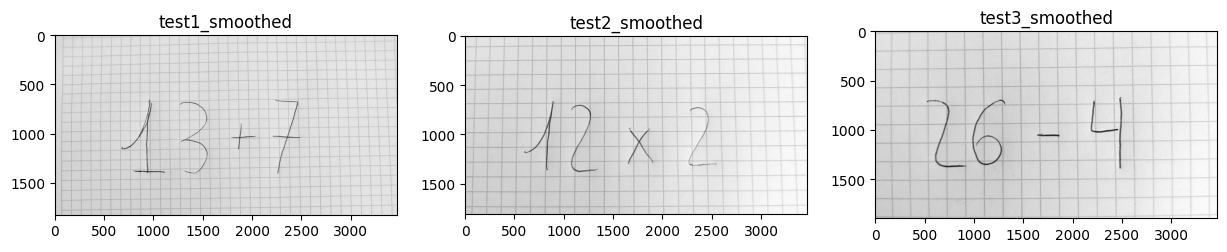

In [6]:
smoothed_img1 = gaussian_filter(image1_gray,w_kernel=3,sigma=2.2,verbose=False)
smoothed_img2 = gaussian_filter(image2_gray,w_kernel=3,sigma=2.2,verbose=False)
smoothed_img3 = gaussian_filter(image3_gray,w_kernel=3,sigma=2.2,verbose=False)

plt.subplot(1,3,1)
plt.title("test1_smoothed")
plt.imshow(smoothed_img1,cmap='gray')

plt.subplot(132)
plt.title("test2_smoothed")
plt.imshow(smoothed_img2,cmap='gray')

plt.subplot(133)
plt.title("test3_smoothed")
plt.imshow(smoothed_img3,cmap='gray')

### <font color="blue"><b><i>2.- K-Means Binarization</i></b></font>

Function taken from previous notebooks

In [7]:
def binarize_kmeans(image,it):
    """ Binarize an image using k-means.   

        Args:
            image: Input image
            it: K-means iteration
    """    
    
    # Set random seed for centroids 
    cv2.setRNGSeed(124)
    
    # Flatten image
    flattened_img = image.reshape((-1,1))
    flattened_img = np.float32(flattened_img)
    
    #Set epsilon
    epsilon = 0.2
    
    # Estabish stopping criteria (either `it` iterations or moving less than `epsilon`)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, it, epsilon)
    
    # Set K parameter (2 for thresholding)
    K = 2
    
    # Call kmeans using random initial position for centroids
    _,label,center=cv2.kmeans(flattened_img,K,None,criteria,it,cv2.KMEANS_RANDOM_CENTERS)
    
    # Colour resultant labels
    center = np.uint8(center) # Get center coordinates as unsigned integers   
    print(center)
    flattened_img = center[label.flatten()] # Get the color (center) assigned to each pixel
    
    # Reshape vector image to original shape
    binarized = flattened_img.reshape((image.shape))

    return binarized
    
    # Show resultant image
    plt.subplot(2,1,1)
    plt.title("Original image")
    plt.imshow(binarized, cmap='gray',vmin=0,vmax=255)
    
    # Show how original histogram have been segmented
    plt.subplot(2,1,2)
    plt.title("Segmented histogram")
    plt.hist([image[binarized==center[0]].ravel(), image[binarized==center[1]].ravel()],256,[0,256], color=["black","gray"],stacked="true")

[[146]
 [133]]
[[147]
 [127]]
[[152]
 [131]]


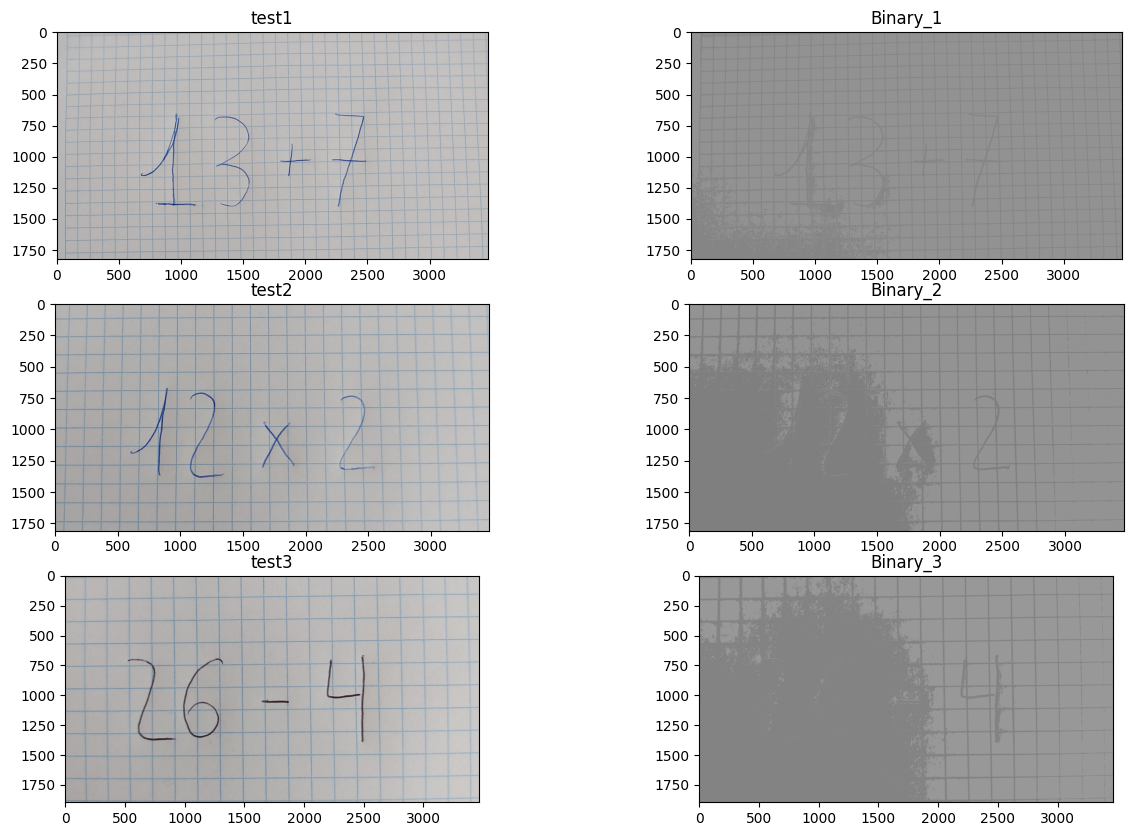

In [8]:
binary_img1 = binarize_kmeans(smoothed_img1,5)
binary_img2 = binarize_kmeans(smoothed_img2,5)
binary_img3 = binarize_kmeans(smoothed_img3,5)

# Show resultant image
plt.subplot(3,2,1)
plt.title("test1")
plt.imshow(image_1)

plt.subplot(3,2,2)
plt.title("Binary_1")
plt.imshow(binary_img1,cmap='gray',vmin=0,vmax=255)

plt.subplot(3,2,3)
plt.title("test2")
plt.imshow(image_2)

plt.subplot(3,2,4)
plt.title("Binary_2")
plt.imshow(binary_img2,cmap='gray',vmin=0,vmax=255)

plt.subplot(3,2,5)
plt.title("test3")
plt.imshow(image_3)

plt.subplot(3,2,6)
plt.title("Binary_3")
plt.imshow(binary_img3,cmap='gray',vmin=0,vmax=255)

[[145 145 145 ... 157 157 157]
 [145 145 145 ... 157 157 157]
 [144 145 145 ... 158 157 157]
 ...
 [118 118 119 ... 161 161 161]
 [119 119 120 ... 161 161 161]
 [119 119 120 ... 161 161 161]]


(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 8.00000e+00, 4.00000e+00,
        8.00000e+00, 1.50000e+01, 9.00000e+00, 7.00000e+00, 2.70000e+01,
        5.60000e+01, 8.50000e+01, 1.19000e+02, 2.20000e+02, 2.65000e+02,
        2.90000e+02, 3.64000e+02, 3.82000e+02, 4.12000e+02, 4.40000e+02,
        4.90000e+02, 5.25000e+02, 5.28000e+02, 5.57000e+02, 5.99000e+02,
        6.71000e+02, 6.50000e+02, 5.64000e+02, 5.92000e+02, 6.40000e+02,
        6.91000e+02, 6.23000e+02, 6.70000e+02, 7.02000e+02, 7.37000e+02,
        7.62000e+02, 7.69000e+02, 8.21000e+02, 8.74000e+02, 9.20000e+02,
        9.85000e+02, 9.96000e+02, 1.10600e+03, 1.19400e+03, 1.24000e+03,
        1.27400e+03, 1.18200e+03, 1.17600e+03, 1.11800e+03, 1.13900e+03,
        1.08800e+03, 1.09800e+03, 1.01600e+03, 9.80000e+02, 9.77000e+02,
        9.55000e+02, 9.62000e+02, 8.76000e+02, 8.85

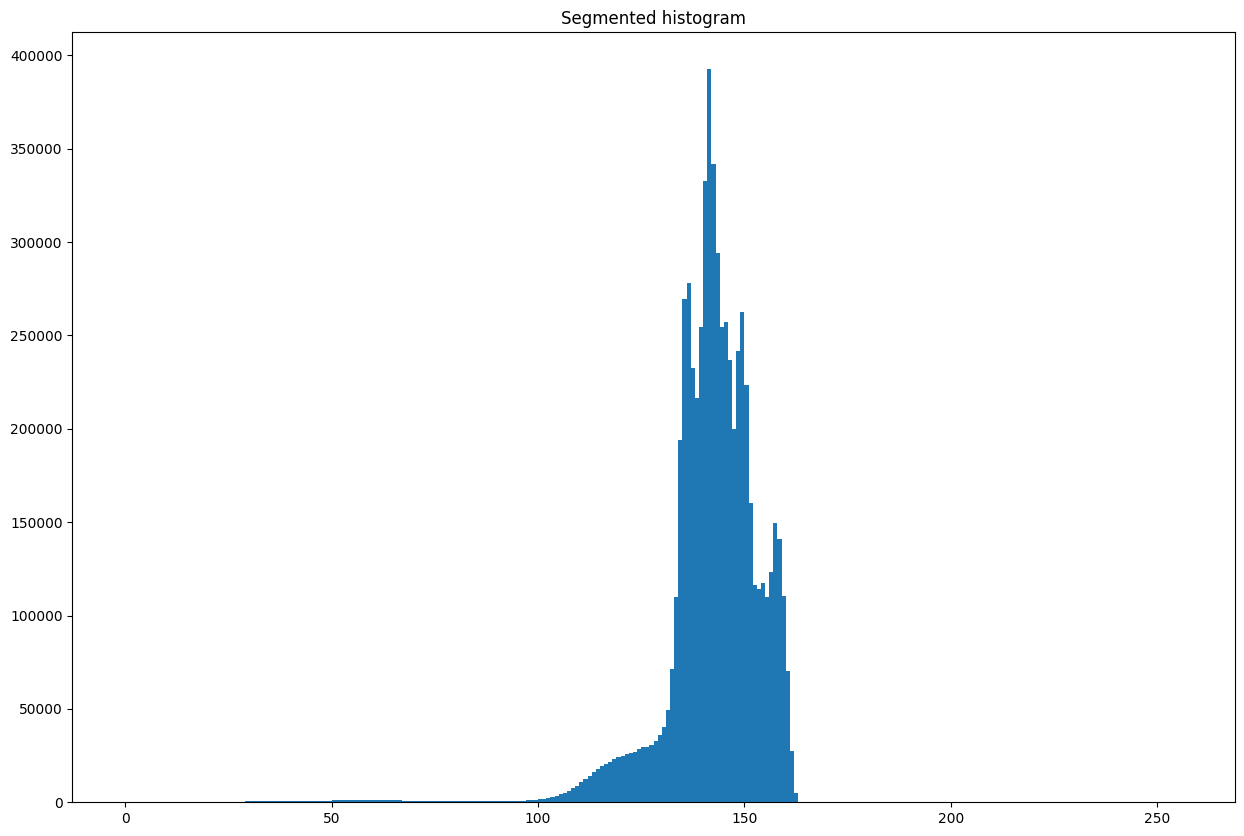

In [18]:
print(smoothed_img3)
plt.title("Segmented histogram")
plt.hist(smoothed_img3.ravel(),256,[0,256])

### <font color="blue"><b><i>2.2 - Adaptative Thresholding</i></b></font>

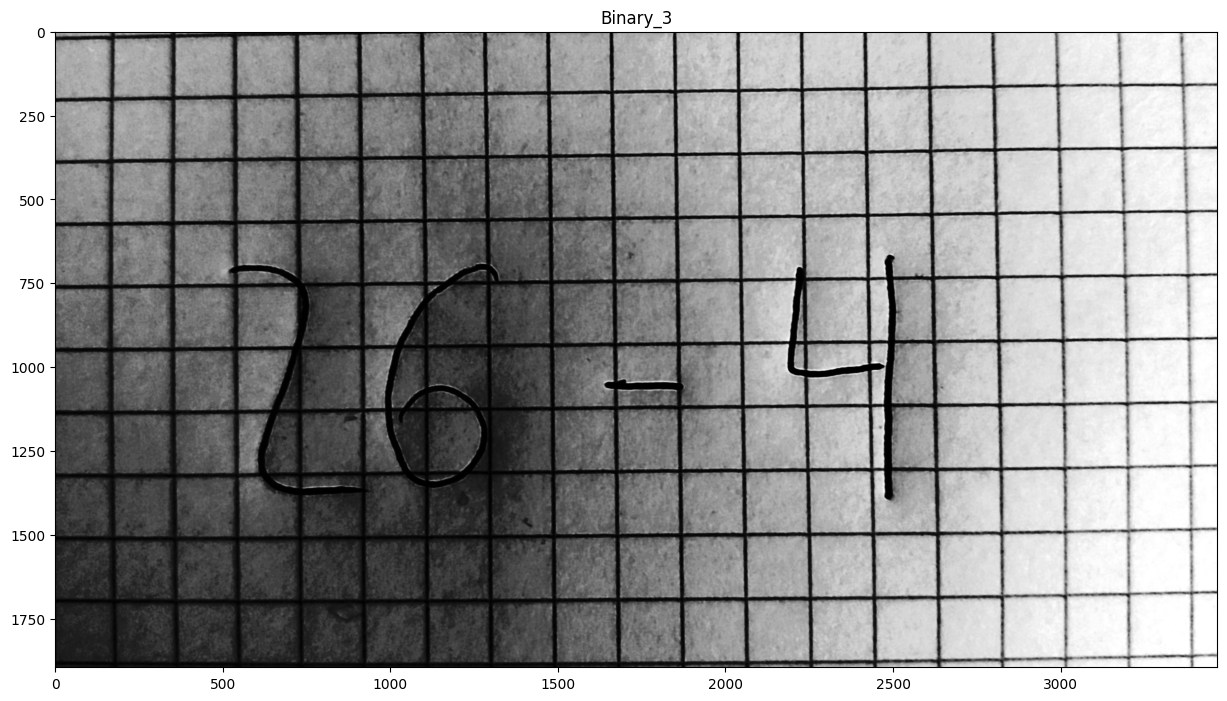

In [12]:

th2 = cv2.equalizeHist(smoothed_img3)
#th2 = cv2.adaptiveThreshold(th2,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

plt.title("Binary_3")
plt.imshow(th2,cmap='gray',vmin=0,vmax=255)